<a href="https://colab.research.google.com/github/hank199599/data_science_from_scratch_reading_log/blob/main/Chapter3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# matplotlib
一個被廣泛運用的函式庫  
可用來製作：
* 長條圖
* 折線圖
* 散點圖
  
✪了解更多：[官方網站](https://matplotlib.org)

In [ ]:
pip install matplotlib

### 圖 3-1
一個簡單的折線圖

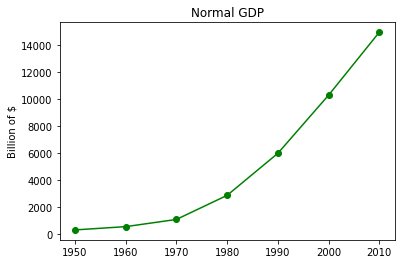

In [ ]:
from matplotlib import pyplot as plt #習慣上會將pyplot函數簡化為plt進行呼叫

years =[1950,1960,1970,1980,1990,2000,2010]
gdp=[300.2,543.3,1075.9,2862.5,5979.6,10289.7,14958.3]

#建立一個折線圖，x軸線是年份；y軸是GDP
plt.plot(years,gdp,color="green",marker="o",linestyle='solid')

#加上標題
plt.title("Normal GDP")

#在y軸上加上標籤
plt.ylabel("Billion of $")
plt.show()

# 長條圖/直方圖
用於將數組**離散項目**之間的數量變化關係表達出來

```
matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)
```



## 圖 3-2
好幾部不同電影獲得奧斯卡金像獎的數量

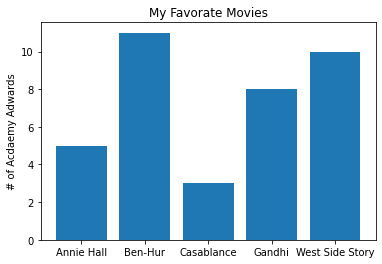

In [ ]:
movies=["Annie Hall","Ben-Hur","Casablance","Gandhi","West Side Story"]
num_oscars=[5,11,3,8,10]

#以[0,1,2,3,4]為x軸，高度為[num_oscars]→畫出長條圖
plt.bar(range(len(movies)),num_oscars)

plt.title("My Favorate Movies")
plt.ylabel("# of Acdaemy Adwards")

#把電影名稱當作x軸的標籤，放在長條圖的中央位置
plt.xticks(range(len(movies)),movies)

plt.show()

## 圖3-3
透過長條圖畫出一堆數值的直方圖

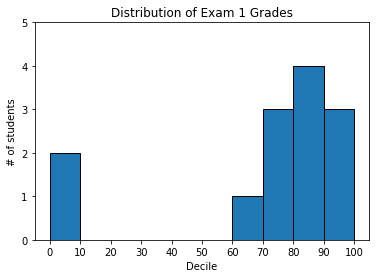

In [ ]:
from collections import Counter
grades=[83,95,91,87,70,0,85,82,100,67,73,77,0]

#以10為區間，並把100算入90這一組 →生成一個字典
histogram = Counter(min(grade//10*10,90) for grade in grades)

plt.bar([x+5 for x in histogram.keys()], # 將長條圖往右平移5個單位
  histogram.values(),            # 將長條圖設定正確的高度
  10,                    # 將長條圖的寬度設定為10
  edgecolor=(0,0,0))             # 每個長條圖都加上黑框

plt.axis([-5,105,0,5])             # x軸範圍設定為 -5 到 105 ；y軸設定為 0 到 5

plt.xticks([10*i for i in range(11)])
plt.xlabel("Decile")
plt.ylabel("# of students")
plt.title("Distribution of Exam 1 Grades")

plt.show()

## 圖3-4
若y軸不是自0開始，易誤導人們的看法


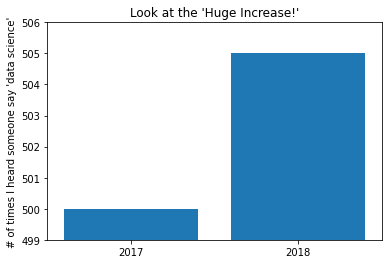

In [ ]:
mentions=[500,505]
years=[2017,2018]

plt.bar(years,mentions,0.8)
plt.xticks(years)
plt.ylabel("# of times I heard someone say 'data science'")

#如果不這麼做，matplotlib會將x軸標籤設為0,1
#然後在角落加個 +2.013e3 (這是matplotlib的問題!)
plt.ticklabel_format(useOffset=False)

#如果y軸只顯示出超出500的部分，易造成誤導效果
plt.axis([2016.5,2018.5,499,506])
plt.title("Look at the 'Huge Increase!'")
plt.show()


## 圖3-5：不在y軸刻意造成誤導效果
採用較合理的Y軸座標軸，使其誤差不被放大

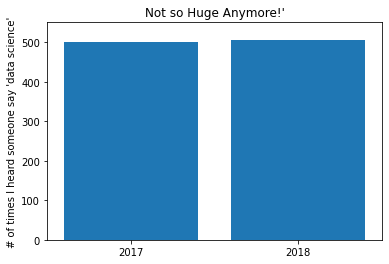

In [ ]:
mentions=[500,505]
years=[2017,2018]

plt.bar(years,mentions,0.8)
plt.xticks(years)
plt.ylabel("# of times I heard someone say 'data science'")

#如果不這麼做，matplotlib會將x軸標籤設為0,1
#然後在角落加個 +2.013e3 (這是matplotlib的問題!)
plt.ticklabel_format(useOffset=False)

#藉由修正的y軸減少誤導情形
plt.axis([2016.5,2018.5,0,550])
plt.title("Not so Huge Anymore!")
plt.show()

# 折線圖
用來呈現**趨勢**

## 圖3-6
帶有圖例說明的幾條折線圖

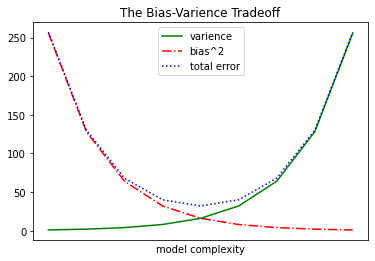

In [ ]:
varience=[1,2,4,8,16,32,64,128,256]
bias_auared=[256,128,64,32,16,8,4,2,1]
total_error=[x+y for x,y in zip(varience,bias_auared)]
xs =[i for i,_ in enumerate(varience)]

#我們可以多次呼叫plot.plt在同一個圖形中顯示多個資料序列
plt.plot(xs,varience,'g-', label="varience")    #綠色實線
plt.plot(xs,bias_auared,'r-.', label="bias^2") #紅色點虛線
plt.plot(xs,total_error,'b:', label="total error") #藍色點線

#由於我們針對每個序列都指定了標籤
#因此我們可以自由設定圖例說明(loc=9 就表示「中間偏上」的位置)
plt.legend(loc=9)
plt.xlabel("model complexity")
plt.xticks([])
plt.title("The Bias-Varience Tradeoff")
plt.show()

# 散點圖
將兩組**成對的資料關係**以視覺化方式呈現出來


```
matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=<deprecated parameter>, edgecolors=None, *, plotnonfinite=False, data=None, **kwargs)
```



## 圖3-7
「使用者的朋友數量」與他們「每天花時間在網站上的分鐘數」兩者之間的關係

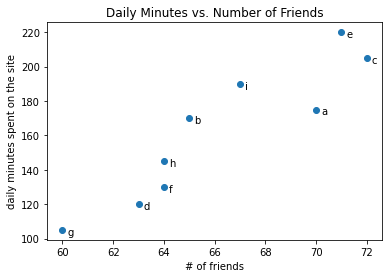

In [ ]:
friends=[70,65,72,63,71,64,60,64,67]
minutes=[175,170,205,120,220,130,105,145,190]
labels=['a','b','c','d','e','f','g','h','i']

plt.scatter(friends,minutes)

#設定每個點的標籤
for label,friend_count,minute_count in zip(labels,friends,minutes):
  plt.annotate(label,
         xy=(friend_count,minute_count),  #把標籤放在相應的點上
         xytext=(5,-5),           #將標籤位置進行平移
         textcoords="offset points"
         )

plt.title("Daily Minutes vs. Number of Friends")
plt.xlabel("# of friends")
plt.ylabel("daily minutes spent on the site")
plt.show()

## 注意事項
若讓matplotlib幫你自動設定刻度，可能會製作出具誤導性的圖形

### 圖3-8
坐標軸無法進行比較的散點圖

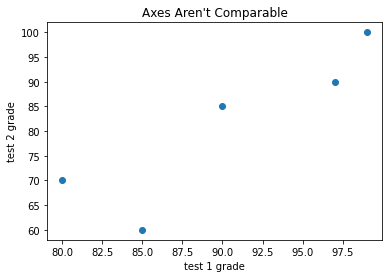

In [ ]:
test_1_grades=[99,90,85,97,80]
test_2_grades=[100,85,60,90,70]

plt.scatter(test_1_grades,test_2_grades)
plt.title("Axes Aren't Comparable")
plt.xlabel("test 1 grade")
plt.ylabel("test 2 grade")
plt.show()

# plt.axis("equal")
用來正確呈現分布的情形

### 圖3-9
坐標軸設定為同尺度後的同一個散點圖

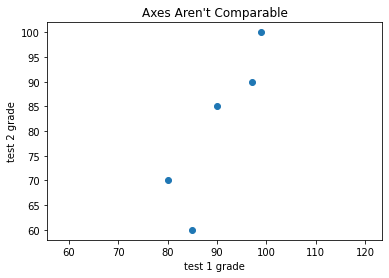

In [ ]:
test_1_grades=[99,90,85,97,80]
test_2_grades=[100,85,60,90,70]

plt.scatter(test_1_grades,test_2_grades)
plt.title("Axes Aren't Comparable")
plt.xlabel("test 1 grade")
plt.ylabel("test 2 grade")
plt.axis("equal") #加入此函數來更動顯示方式
plt.show()